In [1]:
from google.colab import files

uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving results.csv to results.csv
Загружен файл results.csv


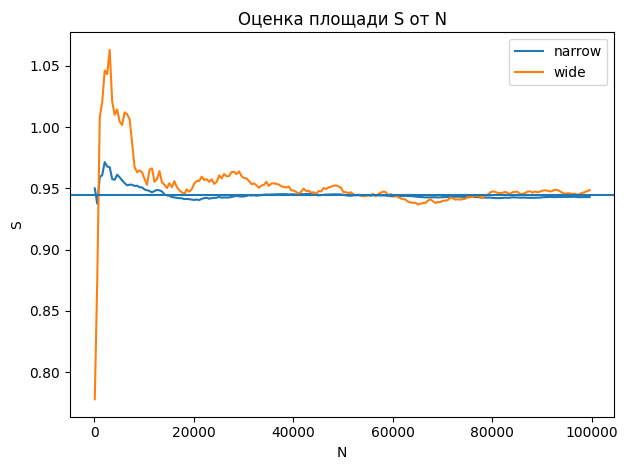

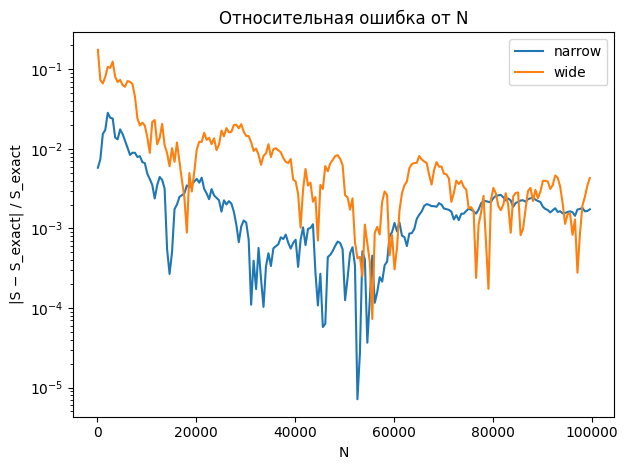

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

S_EXACT = 0.9445171859

df = pd.read_csv("results.csv")

df = df[df["seed"] == 123456].copy()
df["abs_err"] = (df["Shat"] - S_EXACT).abs()
df["rel_err"] = df["abs_err"] / S_EXACT


plt.figure()
for rect in ["narrow", "wide"]:
    sub = df[df["rect"] == rect].sort_values("N")
    plt.plot(sub["N"], sub["Shat"], label=rect)
plt.axhline(S_EXACT)
plt.xlabel("N")
plt.ylabel("S")
plt.title("Оценка площади S от N")
plt.legend()
plt.tight_layout()


plt.figure()
for rect in ["narrow", "wide"]:
    sub = df[df["rect"] == rect].sort_values("N")
    plt.plot(sub["N"], sub["rel_err"], label=rect)
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("|S − S_exact| / S_exact")
plt.title("Относительная ошибка от N")
plt.legend()
plt.tight_layout()
